In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from eegTools import Channel 
from eegTools import *
from scipy.signal import argrelextrema
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random
plt.rcParams["figure.figsize"] = (35,12)

raw = mne.io.read_raw_edf("../data/tutorial_eeg.edf", preload=True)
#raw.info['bads'] = ['EOG EOG1', 'EOG EOG2', 'EMG EMG', 'ECG ECG', 'STI 014']
bads  = ['EOG EOG1', 'EOG EOG2', 'EMG EMG', 'ECG ECG', 'STI 014']

iir_params = dict(order=2, ftype='butter')
raw.filter(l_freq=0.3, h_freq=50., method='iir', iir_params=iir_params)
raw.set_eeg_reference([])

dataArray = raw._data
channels, samples = dataArray.shape

c=[0]*6
picked = 0 # channel index to pick
for picked in range(0,6):
    sampleCh=dataArray[picked,:]
    print("PICKED CHANNEL: %s" %(raw.info["ch_names"][picked]))
    c[picked]= Channel(sampleCh,raw.info['sfreq'],raw.info["ch_names"][picked])

c,m=importMontage(c)

for picked in range(0,6):
    c[picked].operations()
    c[picked].neoOp(20,'derivative')  

cnt = 0
for i in range(1,len(m)):
    #print(i)
    if c[0].featureVec[m[i]] == 'M':
        #print("straight")
        m[i] = m[i]
    elif c[0].featureVec[m[i]-1] == 'M':
        print(m[i])
        m[i] = m[i]-1
        cnt = cnt+1
    elif c[0].featureVec[m[i]-2] == 'M':
        print(m[i])
        m[i] = m[i]-2
        cnt = cnt+1
    elif c[0].featureVec[m[i]+2] == 'M':
        print(m[i])
        m[i] = m[i]+2
        cnt = cnt+1
    elif c[0].featureVec[m[i]+1] == 'M':
        print(m[i])
        m[i] = m[i]+1
        cnt = cnt+1

det = 0
ndet = 0
for i in m:
    if c[0].spykeMark[i] == 1:
        det = det+1
    else:
        ndet = ndet+1
        print(i)
print("DETECTED =",det)
print("NOT DETECTED = ",ndet)

Extracting EDF parameters from ../data/tutorial_eeg.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Setting up band-pass filter from 0.3 - 50 Hz
EEG data marked as already having the desired reference. Preventing automatic future re-referencing to an average reference.
PICKED CHANNEL: EEG FP1
PICKED CHANNEL: EEG FP2
PICKED CHANNEL: EEG F3
PICKED CHANNEL: EEG F4
PICKED CHANNEL: EEG C3
PICKED CHANNEL: EEG C4
Executing getspykes()
Total number of suspected spykes = 1342
Executing getspykes()
Total number of suspected spykes = 1464
Executing getspykes()
Total number of suspected spykes = 1279
Executing getspykes()
Total number of suspected spykes = 1398
Executing getspykes()
Total number of suspected spykes = 309
Executing getspykes()
Total number of suspected spykes = 446
51833
642451
359903
422795
DETECTED = 200

In [3]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | EEG FP1, EEG FP2, EEG F3, EEG F4, EEG C3, EEG C4, ...
    chs : list | 42 items (EEG: 41, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.3 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : int | 1507931460
    nchan : int | 42
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info

38

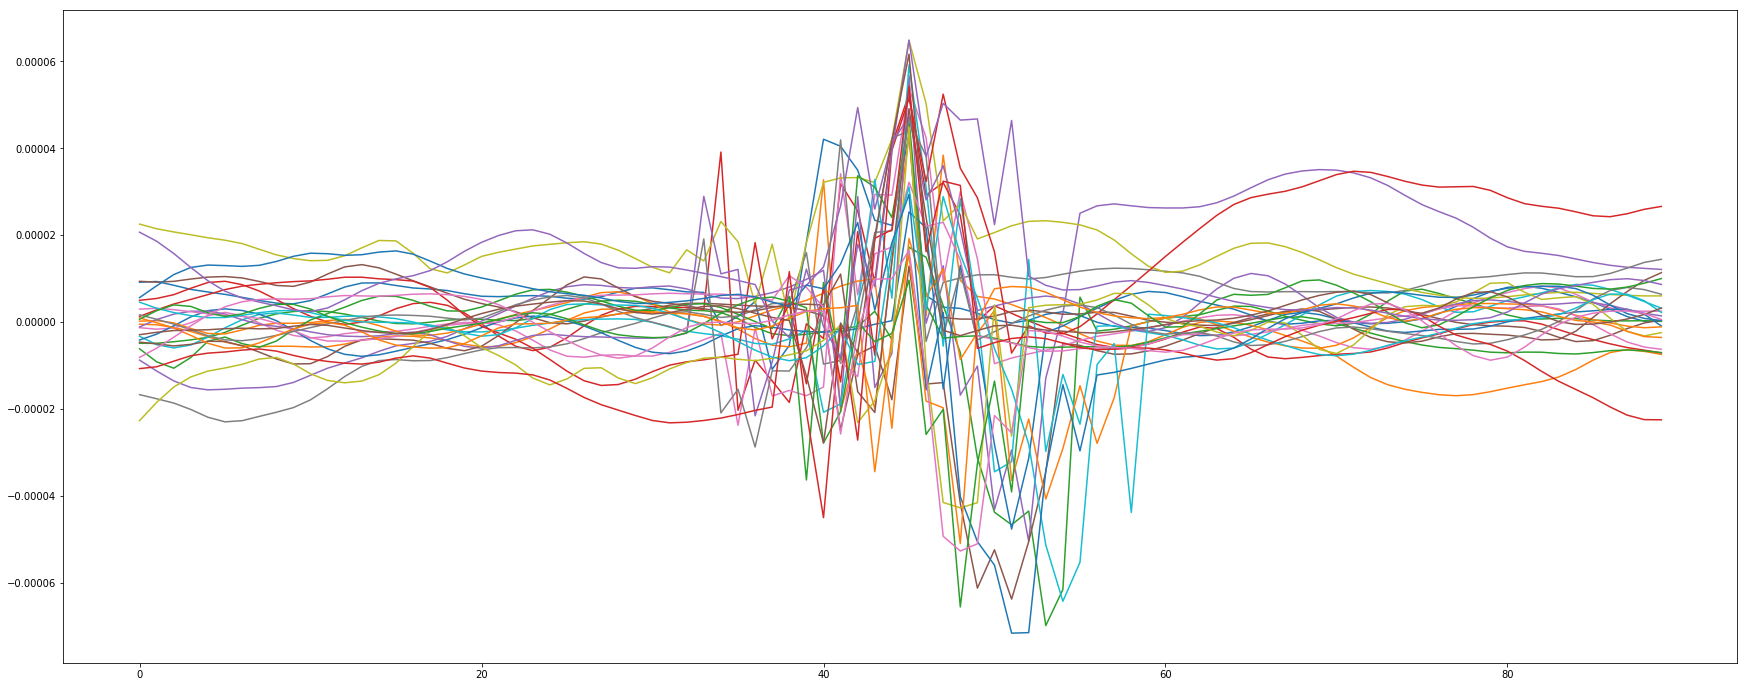

In [2]:
plt.rcParams["figure.figsize"] = (30,12)

suspected = []
for i in range(0,len(c[0].spykeMark)):
    if c[0].spykeMark[i] == 1:
        suspected.append(i)

susp=0
X=[]
y=[]
dr = c[0].epochLen/2
for i in range(0,int(len(suspected)/2)):
    if suspected[i] in m:
        try:
            plt.plot(c[0].data[int(m[i]-dr):int(m[i]+dr)])
            X.append(c[0].data[int(m[i]-dr):int(m[i]+dr)].tolist())
            y.append(1)
        except:
            #print("out of range")
            pass
    else:
            susp = susp+1
            X.append(c[0].data[int(suspected[i]-dr):int(suspected[i]+dr)].tolist())
            y.append(0)

len(X)

len(y)

np.argmax(np.array(X[2])/max(X[2]))

In [ ]:
# np.save("input",X)
# np.save("output",y)

In [3]:
plt.rcParams["figure.figsize"] = (35,12)

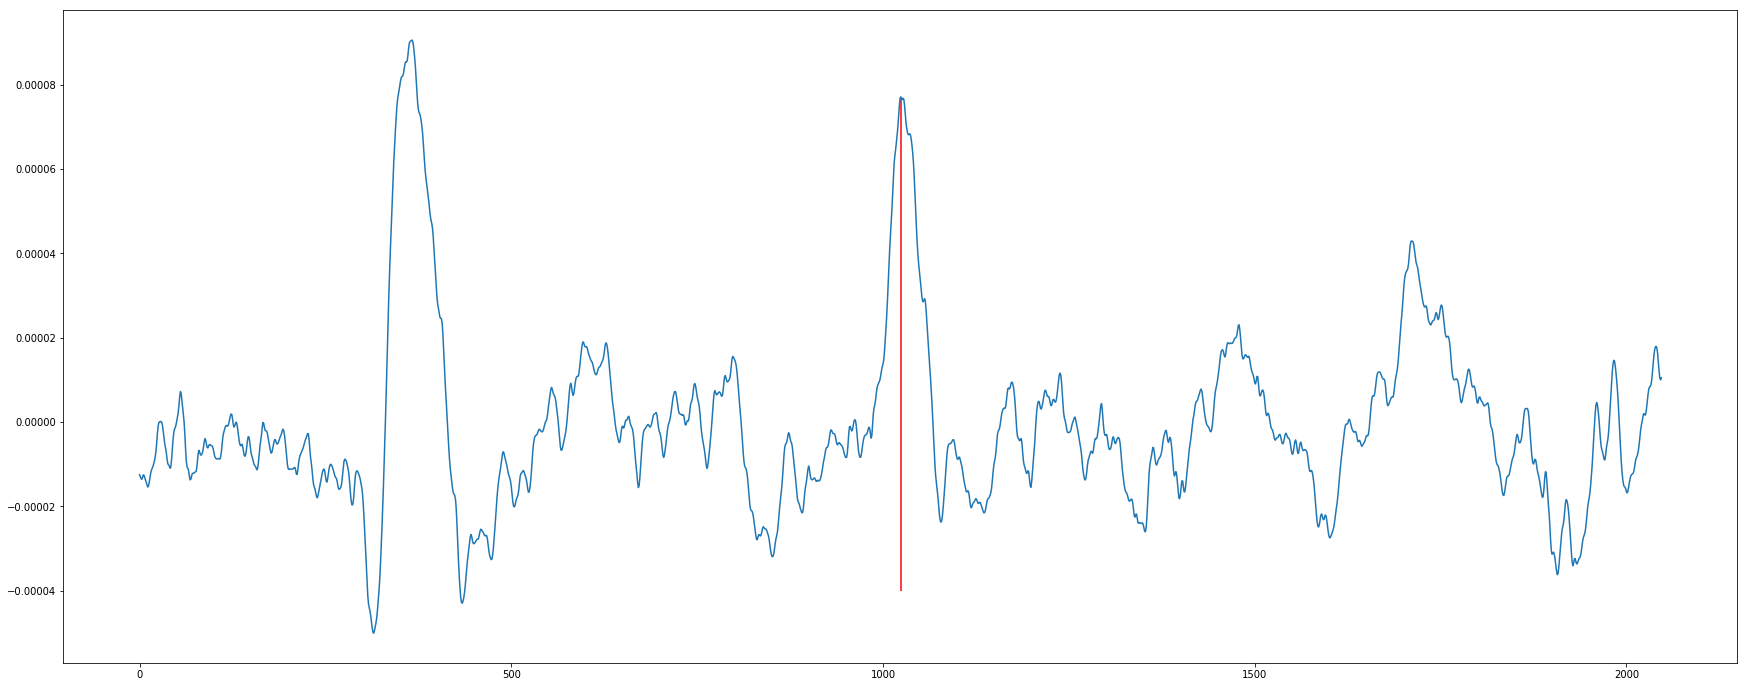

In [11]:
c[0].plotSpyke(4)

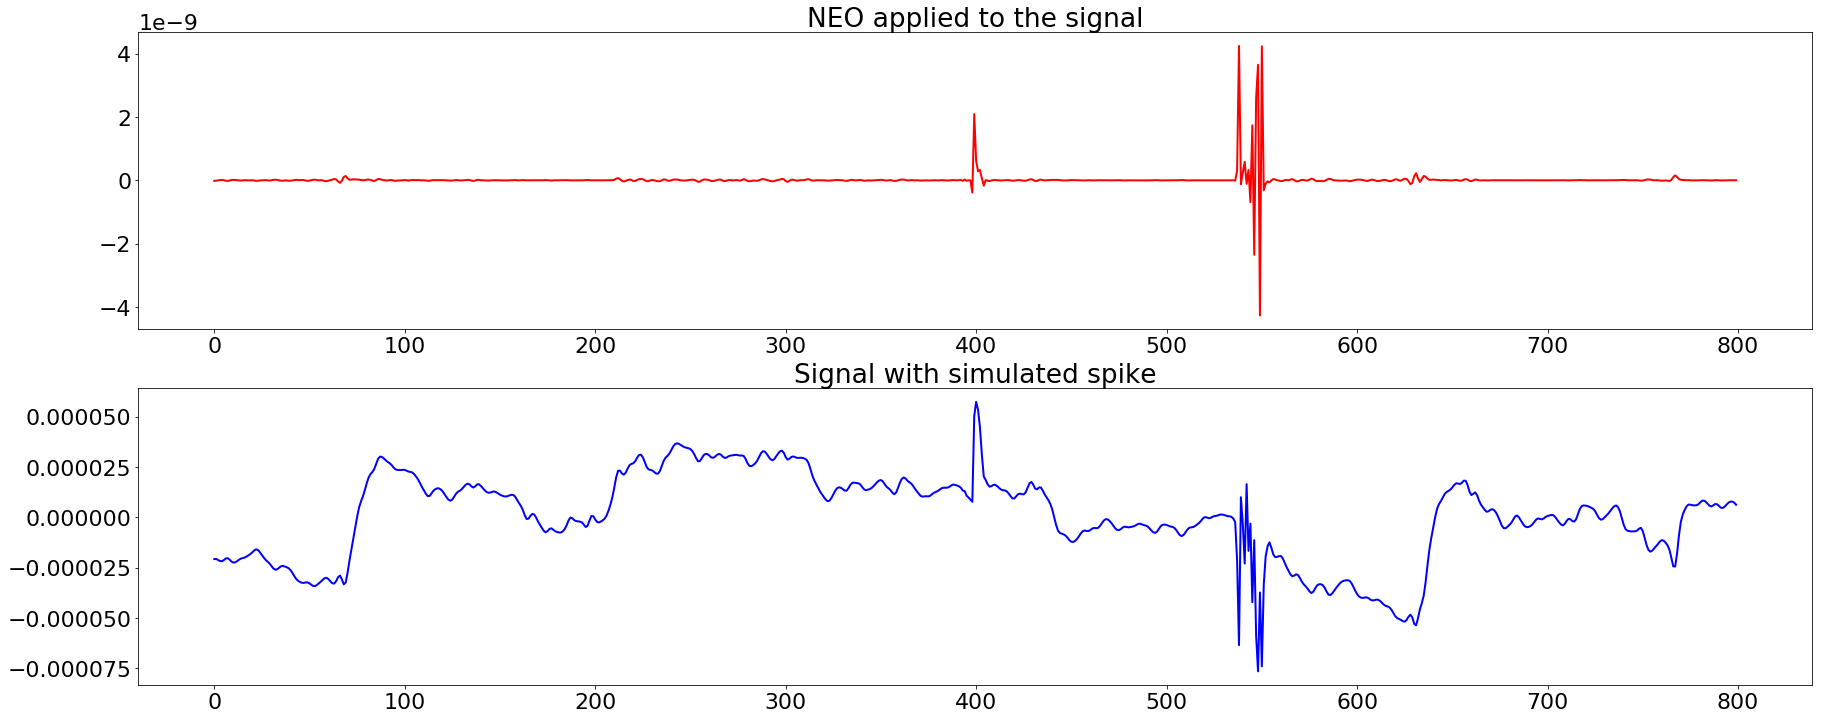

In [88]:
cen= random.choice(m)
plt.rcParams.update({'font.size': 22})
plt.subplot(211)
plt.title("NEO applied to the signal")
plt.plot(c[0].neo[cen-400:cen+400],linewidth=2, color='r')
plt.subplot(212)
plt.title("Signal with simulated spike")
plt.plot(c[0].data[cen-400:cen+400],linewidth=2, color='b')

790635

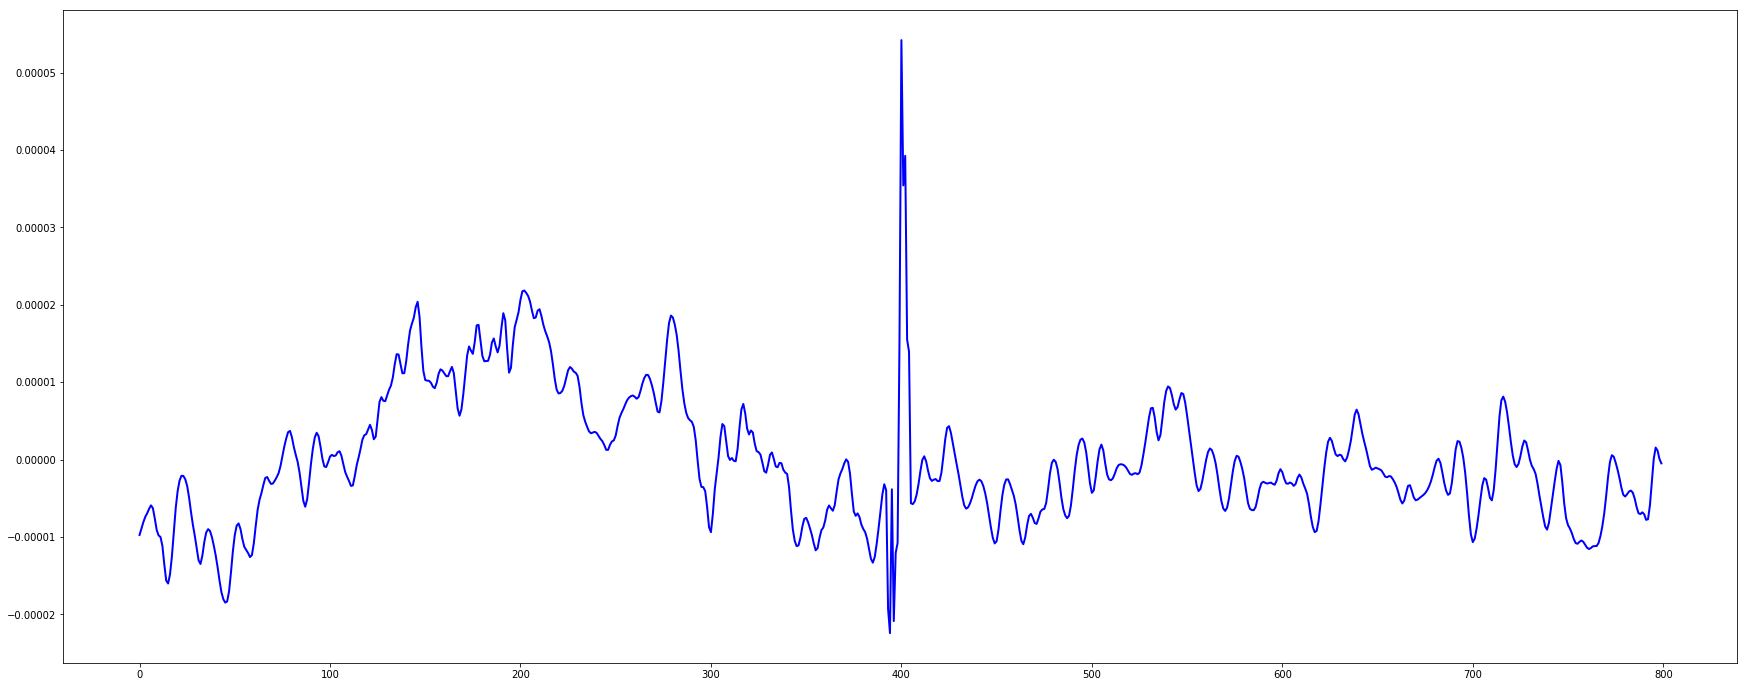

In [22]:
plt.plot(c[0].data[cen-400:cen+400],linewidth=2, color='b')

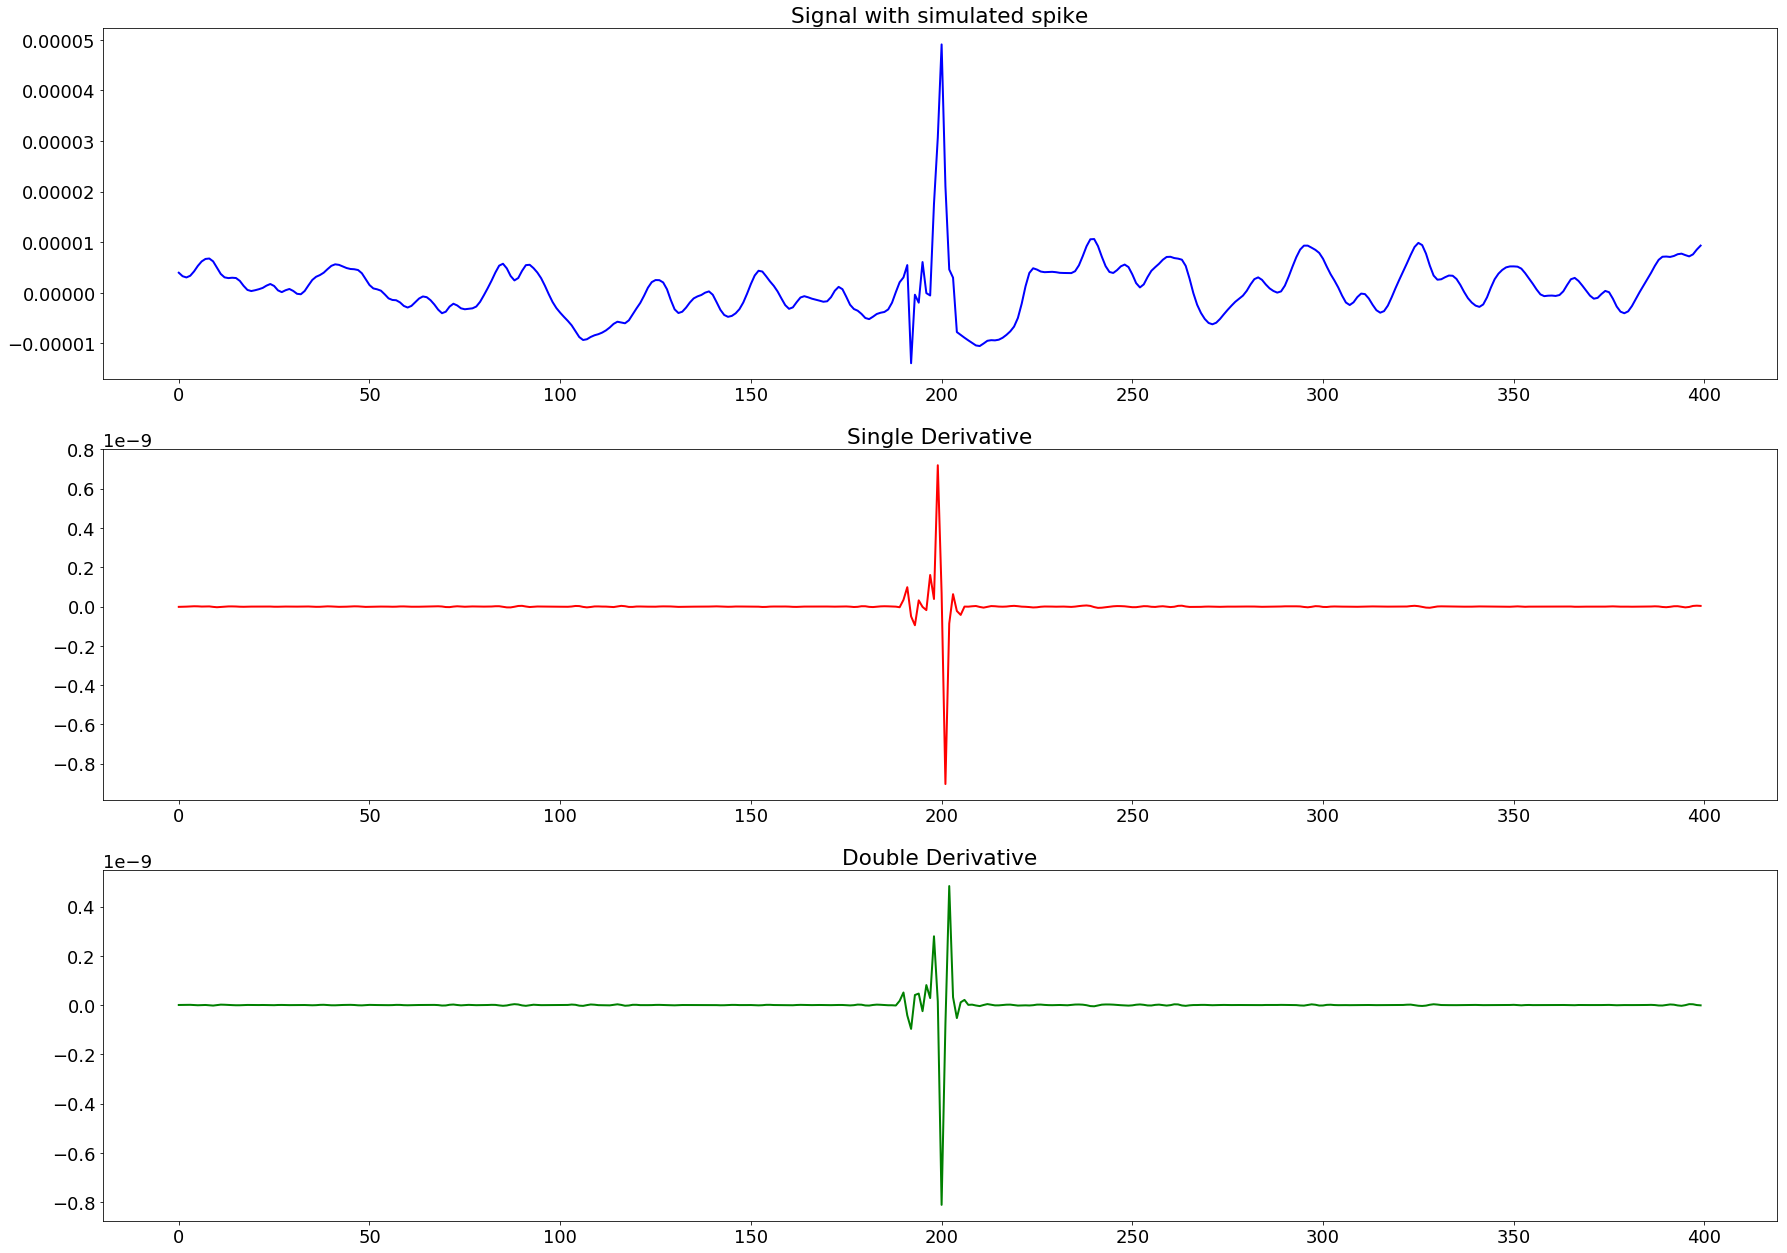

In [57]:
#cen= random.choice(m)
plt.rcParams.update({'font.size': 18})
cen = 410290
l = 200
plt.subplot(313)
plt.title("Double Derivative")
plt.plot(np.gradient(np.gradient(c[0].neo[cen-l:cen+l])),linewidth=2, color='g')
plt.subplot(312)
plt.title("Single Derivative")
plt.plot(np.gradient(c[0].neo[cen-l:cen+l]),linewidth=2, color='r')
plt.subplot(311)
plt.title("Signal with simulated spike")
plt.plot(c[0].data[cen-l:cen+l],linewidth=2, color='b')
plt.gcf().subplots_adjust(bottom=-0.5)

In [48]:
cen

410290

In [4]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()